# Default of Credit Card Clients Dataset

## 0. Problem Description  



This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management

## 0.1. Data Description - Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables, This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.:

## Table of Contents:
1. [Load Packages](#1.)

2. [Data Preprocessing](#2.)
    - 2.1. [Missing Value Checking](#2.1.)
    
    - 2.2. [Data Cleaning](#2.2.)
    
3. [Data Exporation & Analysis](#3.)
    - 3.1. [Dependent Variable - Target](#3.1.)
    
    - 3.2. [Independent Variable - Categorical Feature](#3.2.)
         - 3.2.1. [Categorical feature 1 - SEX](#3.2.1.)
         - 3.2.2. [Categorical feature 1 - Marital Status (MARRIAGE)](#3.2.1.)
         - 3.2.3. [Categorical feature 1 - Educaiton Level (EDUCATION)](#3.2.1.)

    - 3.3. [Independent Variable - Numerical Feature](#3.3.)
        - 3.3.1. [Numerical feature 1 - AGE](#3.3.1.)
        - 3.3.2. [Numerical feature 1 - Credit Limit](#3.3.2.)

    - 3.4. [Categorical Feature 2 - Repayment Status (PAY_XXX)](#3.4.)
    
    - 3.5. [Feature Correlation - Numerical Feature 2](#3.5.)
        - 3.5.1. [Numerical feature 2 - Bill Statement (BILL_AMT_XXX)](#3.5.1.)
        - 3.5.2. [Numerical feature 2 - Previous Payment (PAY_AMT_XXX)](#3.5.2.)

<a id='1.'></a>

## 1. Load Packages

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()
# 30,000 credit card clients, 25 attributes (including ID and Target variable)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Rename for better understanding
df = df.rename(columns={'default.payment.next.month': 'TARGET',
                        'PAY_0': 'PAY_1',
                        'LIMIT_BAL': 'CREDIT_LIMIT'})

In [5]:
# Rename for better understanding
df.rename(columns={'PAY_1':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEP','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   CREDIT_LIMIT  30000 non-null  float64
 2   SEX           30000 non-null  int64  
 3   EDUCATION     30000 non-null  int64  
 4   MARRIAGE      30000 non-null  int64  
 5   AGE           30000 non-null  int64  
 6   PAY_SEP       30000 non-null  int64  
 7   PAY_AUG       30000 non-null  int64  
 8   PAY_JUL       30000 non-null  int64  
 9   PAY_JUN       30000 non-null  int64  
 10  PAY_MAY       30000 non-null  int64  
 11  PAY_APR       30000 non-null  int64  
 12  BILL_AMT_SEP  30000 non-null  float64
 13  BILL_AMT_AUG  30000 non-null  float64
 14  BILL_AMT_JUL  30000 non-null  float64
 15  BILL_AMT_JUN  30000 non-null  float64
 16  BILL_AMT_MAY  30000 non-null  float64
 17  BILL_AMT_APR  30000 non-null  float64
 18  PAY_AMT_SEP   30000 non-nu

<a id='2.'></a>

# 2. Data Preprocessing

<a id='2.1.'></a>
## 2.1. Missing Data Checking

In [7]:
df.isnull().sum()
# No missing data

ID              0
CREDIT_LIMIT    0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_SEP         0
PAY_AUG         0
PAY_JUL         0
PAY_JUN         0
PAY_MAY         0
PAY_APR         0
BILL_AMT_SEP    0
BILL_AMT_AUG    0
BILL_AMT_JUL    0
BILL_AMT_JUN    0
BILL_AMT_MAY    0
BILL_AMT_APR    0
PAY_AMT_SEP     0
PAY_AMT_AUG     0
PAY_AMT_JUL     0
PAY_AMT_JUN     0
PAY_AMT_MAY     0
PAY_AMT_APR     0
TARGET          0
dtype: int64

<a id='2.2.'></a>
## 2.2. Data Cleaning

According to the original variable description in the official documentation of the dataset, 

-	MARRIAGE: Marital status (1=married, 2=single, 3=others)

-	EDUCATION: Educational level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 

<a id='2.2.1.'></a>
### 2.2.1. Categorical variable - MARRIAGE

In [8]:
df.MARRIAGE.value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

It is not expected to have observations labelled as “0” in “MARRIAGE”, however it is sensible to categorized them as "Other" – Group 3 in “MARRIAGE”. 

In [9]:
df.loc[df.MARRIAGE == 0, "MARRIAGE"] = 3
df.MARRIAGE.value_counts().sort_index()

MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64

<a id='2.2.2.'></a>

### 2.2.2. Categorical varible - EDUCATION

In [10]:
df.EDUCATION.value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

Similarly, for the observations with mislabelled and undocumented “0”, “5” and “6” value in “EDUCATION”, it can be categorized them as “Other” – Group 4 in “EDUCATION:.

In [11]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, "EDUCATION"] = 4
df.EDUCATION.value_counts().sort_index()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64

In [12]:
# Export for SAS Enterprise implementation
df.to_csv('df_for_SASEnterprise.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   CREDIT_LIMIT  30000 non-null  float64
 2   SEX           30000 non-null  int64  
 3   EDUCATION     30000 non-null  int64  
 4   MARRIAGE      30000 non-null  int64  
 5   AGE           30000 non-null  int64  
 6   PAY_SEP       30000 non-null  int64  
 7   PAY_AUG       30000 non-null  int64  
 8   PAY_JUL       30000 non-null  int64  
 9   PAY_JUN       30000 non-null  int64  
 10  PAY_MAY       30000 non-null  int64  
 11  PAY_APR       30000 non-null  int64  
 12  BILL_AMT_SEP  30000 non-null  float64
 13  BILL_AMT_AUG  30000 non-null  float64
 14  BILL_AMT_JUL  30000 non-null  float64
 15  BILL_AMT_JUN  30000 non-null  float64
 16  BILL_AMT_MAY  30000 non-null  float64
 17  BILL_AMT_APR  30000 non-null  float64
 18  PAY_AMT_SEP   30000 non-nu

<a id='3.'></a>
# 3. Data Exploration

<a id='3.1.'></a>
## 3.1. Dependent Variable - TARGET

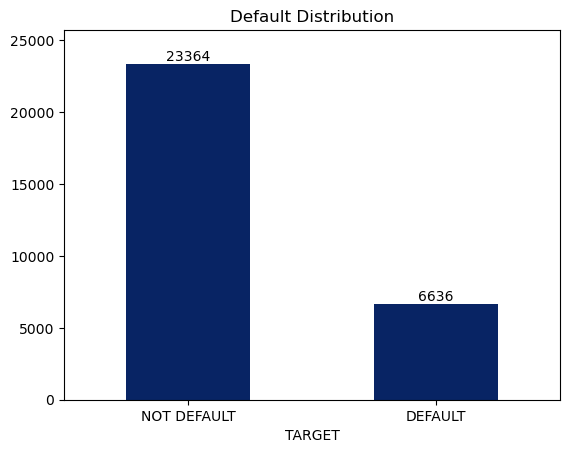

In [14]:
import matplotlib.pyplot as plt

# Create the value counts and bar plot
value_counts = df['TARGET'].value_counts()
ax = value_counts.plot(kind='bar', color='#082464')

# Set a custom title
plt.title("Default Distribution")

# Rename x-axis labels and rotate them horizontally
ax.set_xticklabels(['NOT DEFAULT', 'DEFAULT'], rotation=0)

# Display the total number on top of each bar with adjusted spacing
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 0.5), ha='center', va='bottom')

# Increase the space between the top of the bars and the numbers
ax.margins(y=0.1)

plt.show()

A number of 6,636 out of 30,000 (or 22%) of clients will default. 

The data has a slight imbalance with respect to the target value.

<a id='3.2.'></a>
## 3.2. Independent Variable - Categorical Feature 1

<a id='3.2.1.'></a>
### 3.2.1. Categorical Feature 1 - SEX

In [15]:
df.SEX.value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

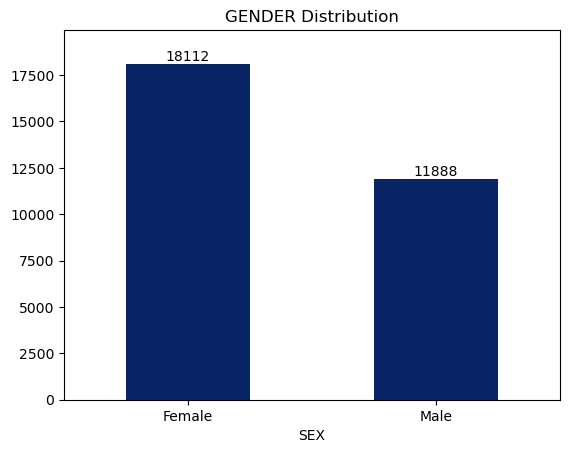

In [16]:
import matplotlib.pyplot as plt

# Create the value counts and bar plot
value_counts = df['SEX'].value_counts()
ax = value_counts.plot(kind='bar', color='#082464')

# Set a custom title
plt.title("GENDER Distribution")

# Rename x-axis labels and rotate them horizontally
ax.set_xticklabels(['Female', 'Male'], rotation=0)

# Display the total number on top of each bar with adjusted spacing
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 0.5), ha='center', va='bottom')

# Increase the space between the top of the bars and the numbers
ax.margins(y=0.1)

plt.show()

In [17]:
gender = df.groupby(["SEX", "TARGET"]).size().unstack(1)
gender = gender.rename(columns={0: 'Not default', 1: 'Default'})
gender.rename(index={1: 'Male', 2: 'Female'}, inplace=True)
gender["Default Percentage"] = gender['Default']/(gender['Not default'] + gender['Default'])
gender

TARGET,Not default,Default,Default Percentage
SEX,,,
Male,9015,2873,0.241672
Female,14349,3763,0.207763


Considering the average default rate is 22%, 

- men are more likely going to default in the next month (than women)

(But this is not our conclusion, just some prior finding using just a variable)

<a id='3.2.2.'></a>
### 3.2.2. Categorical Feature 1 - Marital Status (MARRIAGE)

In [18]:
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

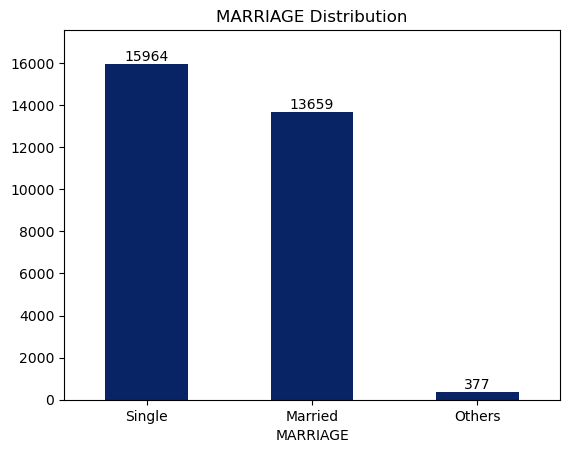

In [19]:
import matplotlib.pyplot as plt

# Create the value counts and bar plot
value_counts = df.MARRIAGE.value_counts()
ax = value_counts.plot(kind='bar', color='#082464')

# Set a custom title
plt.title("MARRIAGE Distribution")

# Rename x-axis labels and rotate them horizontally
ax.set_xticklabels(['Single', 'Married', 'Others'], rotation=0)

# Display the total number on top of each bar with adjusted spacing
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 0.5), ha='center', va='bottom')

# Increase the space between the top of the bars and the numbers
ax.margins(y=0.1)

plt.show()

In [20]:
marriage = df.groupby(["MARRIAGE", "TARGET"]).size().unstack(1)
marriage["Default Percentage"] = marriage[1]/(marriage[0] + marriage[1])
marriage = marriage.rename(columns={0: 'Not default', 1: 'Default'})
marriage.rename(index={1: 'Married', 2: 'Single', 3: 'Other'}, inplace=True)

marriage

TARGET,Not default,Default,Default Percentage
MARRIAGE,,,
Married,10453,3206,0.234717
Single,12623,3341,0.209283
Other,288,89,0.236074


<a id='3.2.2.'></a>
### 3.2.3. Categorical Feature 1 - EDUCATION

In [21]:
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

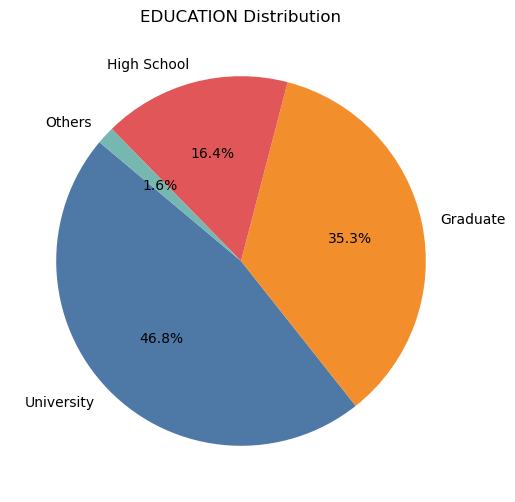

In [22]:
import matplotlib.pyplot as plt


# Create the value counts
value_counts = df['EDUCATION'].value_counts()

# Define custom labels and colors
custom_labels = ['University', 'Graduate', 'High School', 'Others']
custom_colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(value_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)

# Set a custom title
plt.title("EDUCATION Distribution")

plt.show()

In [23]:
education = df.groupby(["EDUCATION", "TARGET"]).size().unstack(1)
education = education.rename(columns={0: 'Not default', 1: 'Default'})
education.rename(index={1: 'Graduate', 2: 'University', 3: 'High Sch', 4: 'Other'}, inplace=True)
education["Default Percentage"] = education['Default']/(education['Not default'] + education['Default'])
education

TARGET,Not default,Default,Default Percentage
EDUCATION,,,
Graduate,8549,2036,0.192348
University,10700,3330,0.237349
High Sch,3680,1237,0.251576
Other,435,33,0.070513


Seems that the higher the education level, the lower the probability of defaulting in the next month

- According to the documentation, other is most likely refer to education lower than high school, but since the number of data (460) is not significant compare to the overall number of data (30000), so just ignore it first

<a id='3.3.'></a>
## 3.3. Independent Variable - Numerical Feature 1

<a id='3.3.1.'></a>
### 3.3.1. Numerical Feature 1 - AGE

In [24]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [25]:
df["AGE"].value_counts().head()

# Largest number of AGE is 29 (1605)

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
Name: count, dtype: int64

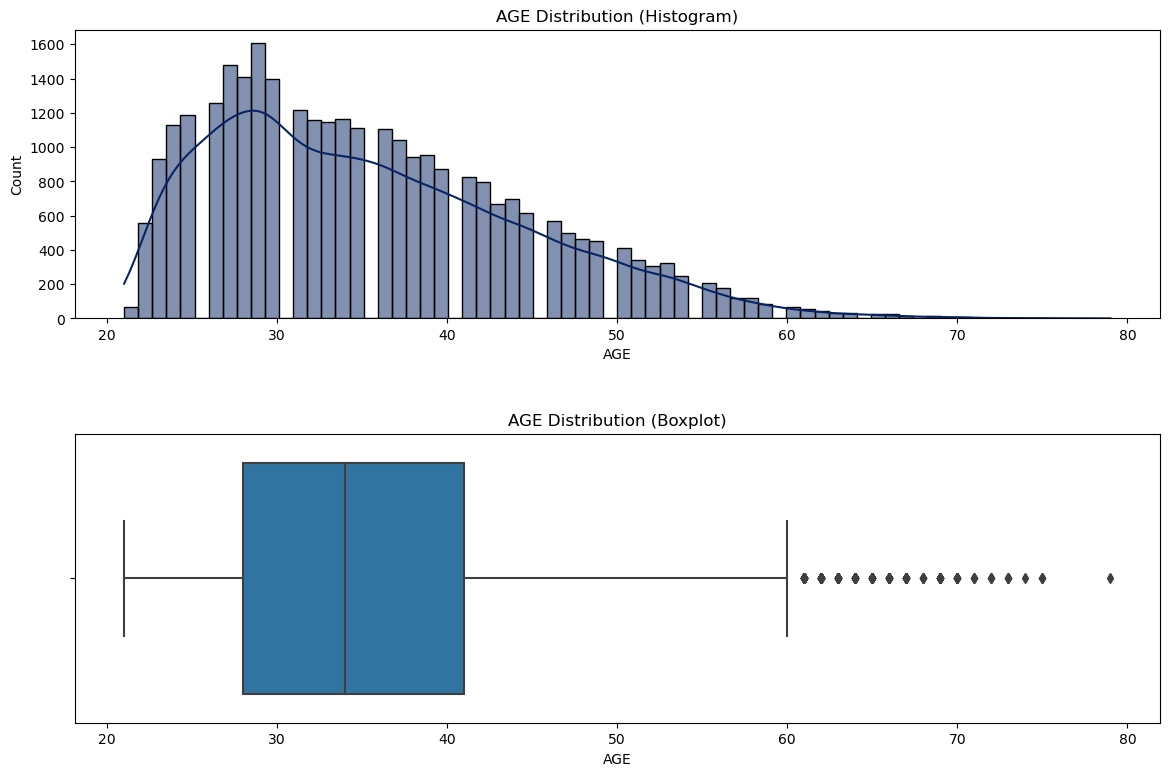

In [26]:
# Create a figure with two subplots (one for the histogram and one for the boxplot)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 9))

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Create the histogram on the first subplot
sns.histplot(df['AGE'], kde=True, color="#082464", ax=axes[0])
axes[0].set_title('AGE Distribution (Histogram)')

# Create the boxplot on the second subplot
sns.boxplot(x=df['AGE'], ax=axes[1])
axes[1].set_title('AGE Distribution (Boxplot)')

# Display the plots
plt.show()

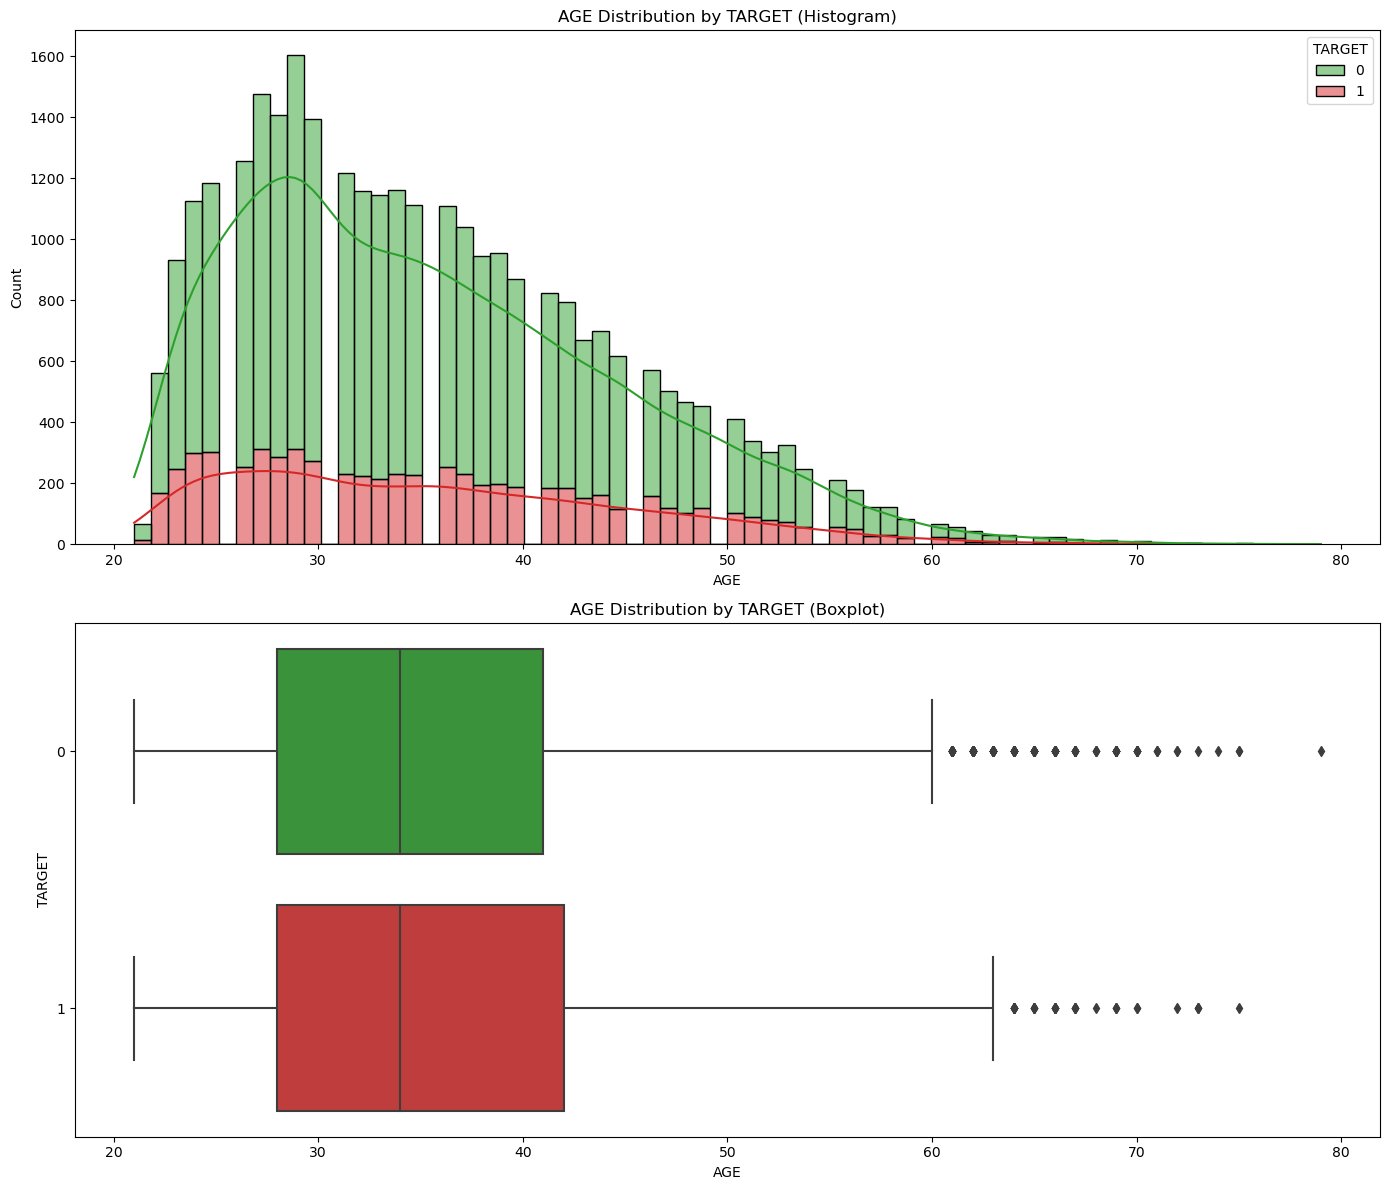

In [27]:
# Set the size of the overall figure
plt.figure(figsize=(14, 12))

# Define a custom color palette
custom_palette = ["#2ca02c", "#d62728"]  # red and green

# Create a subplot for the histogram
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
sns.histplot(data=df, x='AGE', hue='TARGET', kde=True, palette=custom_palette, multiple="stack")
plt.title('AGE Distribution by TARGET (Histogram)')

# Create a subplot for the boxplot
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
sns.boxplot(data=df, x='AGE', y='TARGET', orient='h', palette=custom_palette)
plt.title('AGE Distribution by TARGET (Boxplot)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/dm/pzxw07512wn6dzg0zhn48mb40000gn/T/ipykernel_27919/4258981714.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0, kde=True, color="green")
/var/folders/dm/pzxw07512wn6dzg0zhn48mb40000gn/T/ipykernel_27919/4258981714.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_

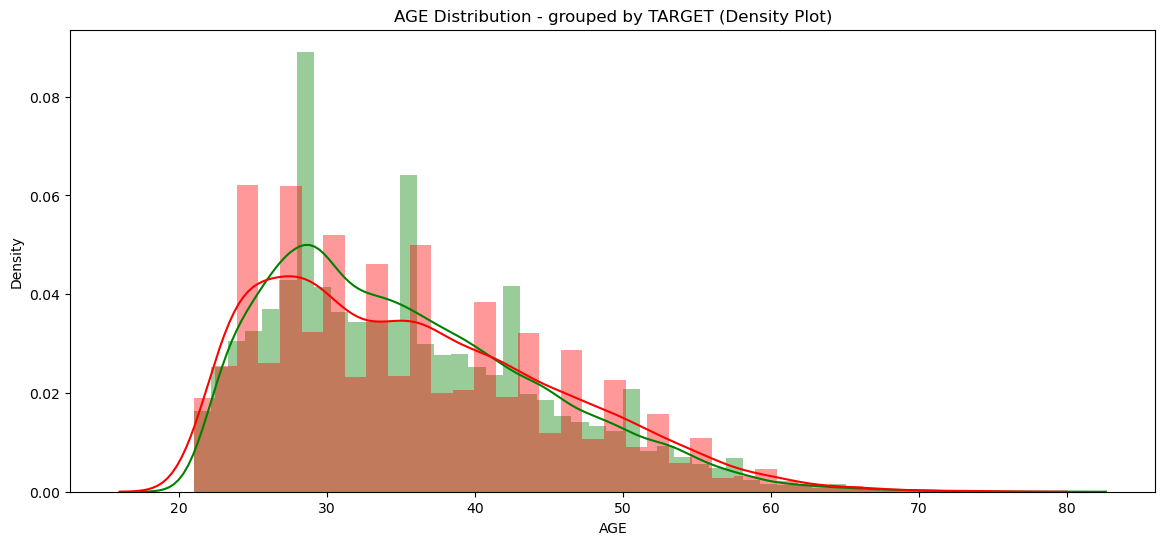

In [28]:
# Group by TARGET
class_0 = df.loc[df['TARGET'] == 0]["AGE"]
class_1 = df.loc[df['TARGET'] == 1]["AGE"]
plt.figure(figsize = (14,6))
plt.title('AGE Distribution - grouped by TARGET (Density Plot)')
sns.distplot(class_0, kde=True, color="green")
sns.distplot(class_1, kde=True, color="red")
plt.show()

<a id='3.3.2.'></a>
### 3.3.2. Numerical Feature 1 - CREDIT_LIMIT

In [29]:
df.CREDIT_LIMIT.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: CREDIT_LIMIT, dtype: float64

In [30]:
df["CREDIT_LIMIT"].value_counts().head()

# Largest number of credit limit is 50000 (3365)

CREDIT_LIMIT
50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: count, dtype: int64

Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

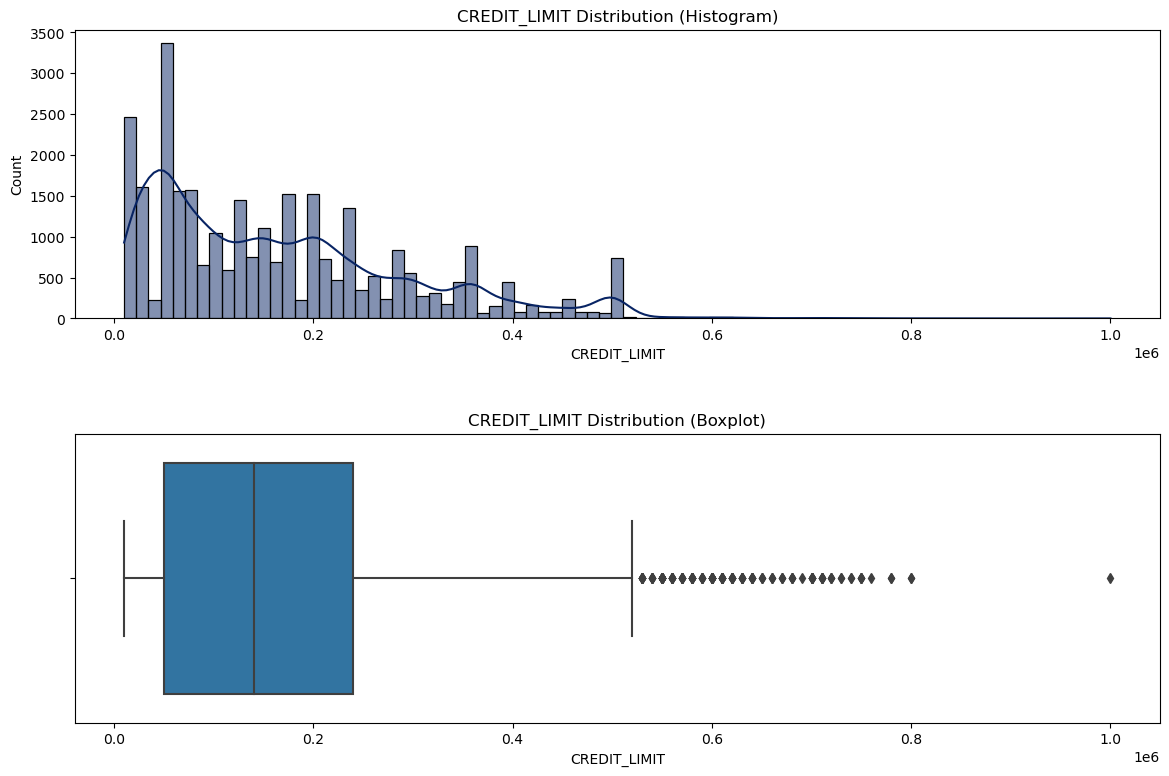

In [31]:
# Create a figure with two subplots (one for the histogram and one for the boxplot)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 9))

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Create the histogram on the first subplot
sns.histplot(df['CREDIT_LIMIT'], kde=True, color="#082464", ax=axes[0])
axes[0].set_title('CREDIT_LIMIT Distribution (Histogram)')

# Create the boxplot on the second subplot
sns.boxplot(x=df['CREDIT_LIMIT'], ax=axes[1])
axes[1].set_title('CREDIT_LIMIT Distribution (Boxplot)')

# Display the plots
plt.show()

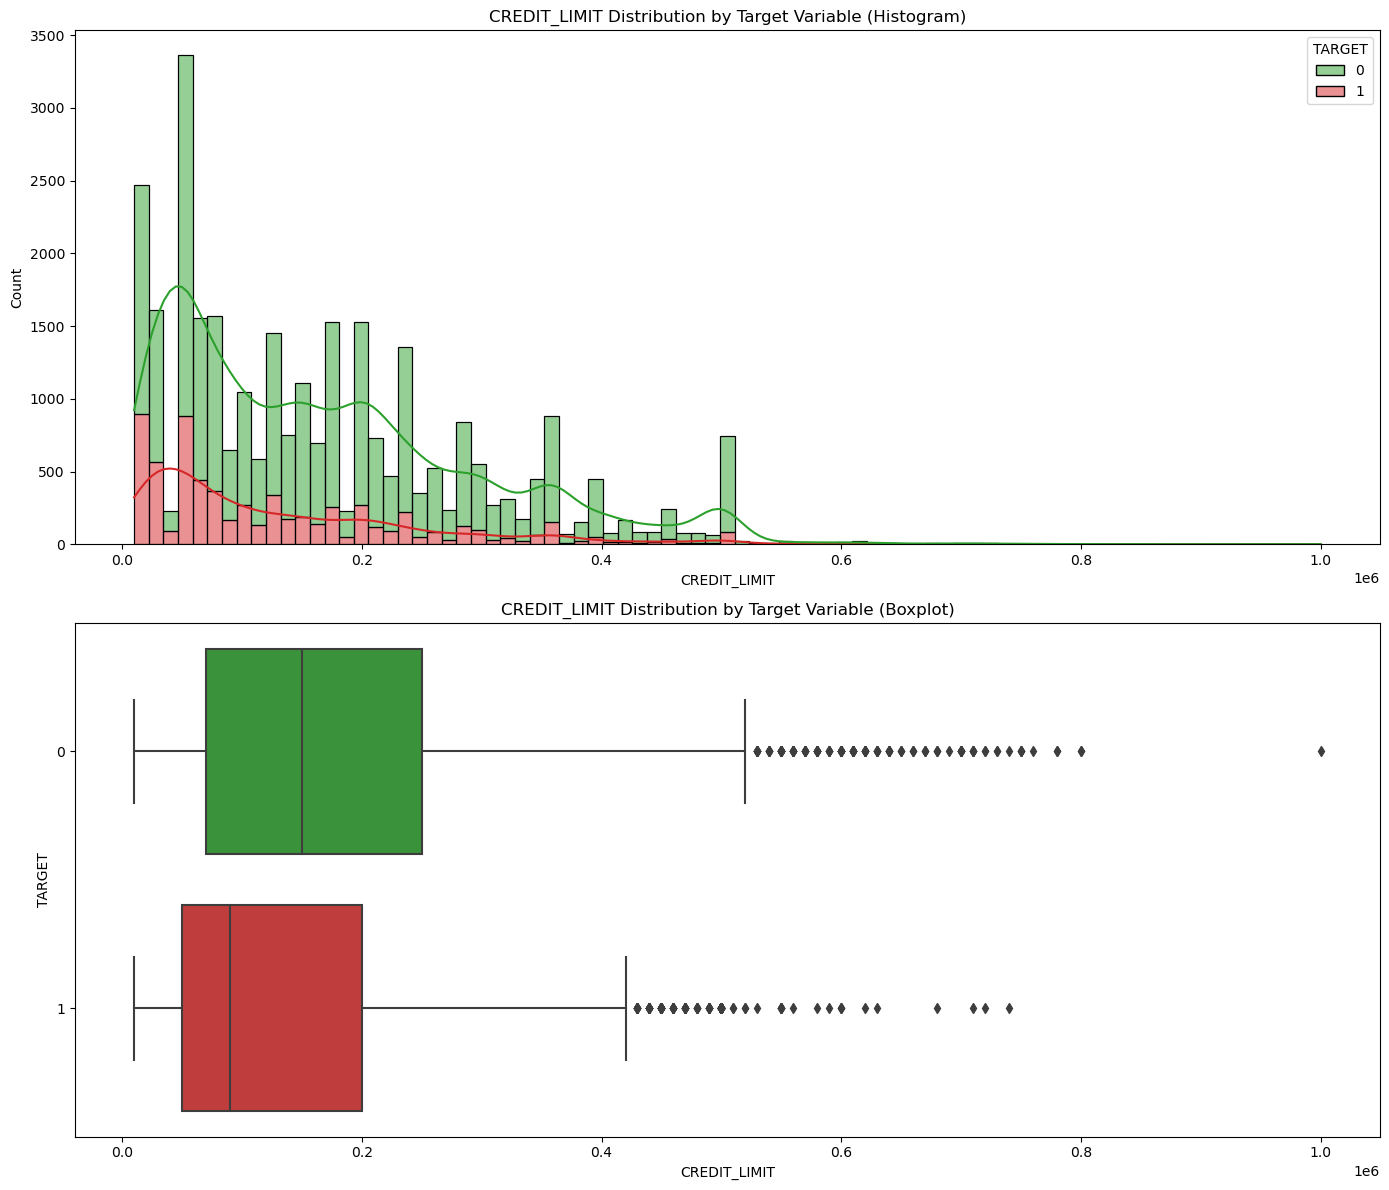

In [32]:
# Set the size of the overall figure
plt.figure(figsize=(14, 12))

# Define a custom color palette
custom_palette = ["#2ca02c", "#d62728"]  # red and green

# Create a subplot for the histogram
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
sns.histplot(data=df, x='CREDIT_LIMIT', hue='TARGET', kde=True, palette=custom_palette, multiple="stack")
plt.title('CREDIT_LIMIT Distribution by Target Variable (Histogram)')

# Create a subplot for the boxplot
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
sns.boxplot(data=df, x='CREDIT_LIMIT', y='TARGET', orient='h', palette=custom_palette)
plt.title('CREDIT_LIMIT Distribution by Target Variable (Boxplot)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/dm/pzxw07512wn6dzg0zhn48mb40000gn/T/ipykernel_27919/2014378946.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=100, color="green")
/var/folders/dm/pzxw07512wn6dzg0zhn48mb40000gn/T/ipykernel_27919/2014378946.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

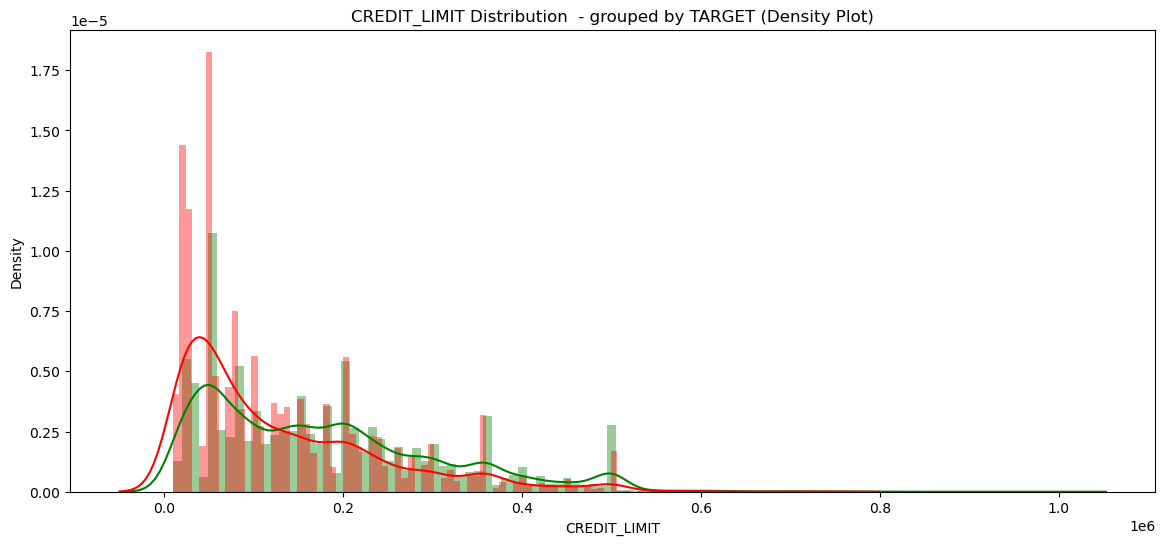

In [33]:
# visualize the density plot for amount of credit limit, group by TARGET
class_0 = df.loc[df['TARGET'] == 0]["CREDIT_LIMIT"]
class_1 = df.loc[df['TARGET'] == 1]["CREDIT_LIMIT"]
plt.figure(figsize = (14,6))
plt.title('CREDIT_LIMIT Distribution  - grouped by TARGET (Density Plot)')
sns.distplot(class_0,kde=True,bins=100, color="green")
sns.distplot(class_1,kde=True,bins=100, color="red")
plt.show()

In [34]:
credit_limit = df.groupby(["CREDIT_LIMIT", "TARGET"]).size().unstack(1)
credit_limit = credit_limit.rename(columns={0: 'Not default', 1: 'Default'})
credit_limit["Default Percentage"] = credit_limit['Default']/(credit_limit['Not default'] + credit_limit['Default'])
credit_limit.head(15)

TARGET,Not default,Default,Default Percentage
CREDIT_LIMIT,,,
10000.0,296.0,197.0,0.399594
16000.0,2.0,NaN,NaN
20000.0,1278.0,698.0,0.353239
30000.0,1042.0,568.0,0.352795
40000.0,138.0,92.0,0.400000
50000.0,2480.0,885.0,0.263001
60000.0,592.0,233.0,0.282424
70000.0,521.0,210.0,0.287278
80000.0,1204.0,363.0,0.231653


- Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). 

<a id='3.4.'></a>
## 3.4. Independent Variable - Categorical Feature 2 - Repayment Status (PAY_XXX)

In [35]:
pay_columns = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

frequency_distributions = {}
for column in pay_columns:
    frequency_distributions[column] = df[column].value_counts().sort_index()

# Convert the dictionary of frequency distributions to a DataFrame for better readability.
frequency_distribution_df = pd.DataFrame(frequency_distributions)

frequency_distribution_df = frequency_distribution_df.fillna(0)
frequency_distribution_df

,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,0.0,0.0
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


## Sum up the number of clients who had one or more instances of payment delays (Status: 1-8),

In [36]:
# Create a new DataFrame to hold the modified PAY_ variables
pay_status_refined = df[pay_columns].copy()

# Any positive value in PAY_ columns indicates a delay, so we'll replace any positive value with 1
pay_status_refined[pay_columns] = pay_status_refined[pay_columns].applymap(lambda x: 1 if x > 0 else x)


In [37]:
pay_columns = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

frequency_distributions = {}
for column in pay_columns:
    frequency_distributions[column] = pay_status_refined[column].value_counts().sort_index()

# Convert the dictionary of frequency distributions to a DataFrame for better readability.
frequency_distribution_df = pd.DataFrame(frequency_distributions)

frequency_distribution_df = frequency_distribution_df.fillna(0)
frequency_distribution_df

,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
-2,2759,3782,4085,4348,4546,4895
-1,5686,6050,5938,5687,5539,5740
0,14737,15730,15764,16455,16947,16286
1,6818,4438,4213,3510,2968,3079


In [38]:
# Now, add the target variable to this new DataFrame
pay_status_refined['TARGET'] = df['TARGET']
pay_status_refined

,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,TARGET
0,1,1,-1,-1,-2,-2,1
1,-1,1,0,0,0,1,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0,0
29997,1,1,1,-1,0,0,1
29998,1,-1,0,0,0,-1,1


## Pivot Table: Repayment Status variable (PAY_XXX) against Target Variable

In [39]:
pay_status_SEP_with_target = pay_status_refined.groupby(["PAY_SEP", "TARGET"]).size().unstack(1)
pay_status_SEP_with_target = pay_status_SEP_with_target.rename(columns={0: 'Not default', 1: 'Default'})
pay_status_SEP_with_target["Default Percentage"] = pay_status_SEP_with_target['Default']/(pay_status_SEP_with_target['Not default'] + pay_status_SEP_with_target['Default'])
pay_status_SEP_with_target

TARGET,Not default,Default,Default Percentage
PAY_SEP,,,
-2,2394,365,0.132294
-1,4732,954,0.167781
0,12849,1888,0.128113
1,3389,3429,0.502933


In [40]:
pay_status_AUG_with_target = pay_status_refined.groupby(["PAY_AUG", "TARGET"]).size().unstack(1)
pay_status_AUG_with_target = pay_status_AUG_with_target.rename(columns={0: 'Not default', 1: 'Default'})
pay_status_AUG_with_target["Default Percentage"] = pay_status_AUG_with_target['Default']/(pay_status_AUG_with_target['Not default'] + pay_status_AUG_with_target['Default'])
pay_status_AUG_with_target

TARGET,Not default,Default,Default Percentage
PAY_AUG,,,
-2,3091,691,0.182708
-1,5084,966,0.159669
0,13227,2503,0.159123
1,1962,2476,0.557909


In [41]:
pay_status_MAY_with_target = pay_status_refined.groupby(["PAY_MAY", "TARGET"]).size().unstack(1)
pay_status_MAY_with_target = pay_status_MAY_with_target.rename(columns={0: 'Not default', 1: 'Default'})
pay_status_MAY_with_target["Default Percentage"] = pay_status_MAY_with_target['Default']/(pay_status_MAY_with_target['Not default'] + pay_status_MAY_with_target['Default'])
pay_status_MAY_with_target

TARGET,Not default,Default,Default Percentage
PAY_MAY,,,
-2,3651,895,0.196876
-1,4642,897,0.161943
0,13752,3195,0.188529
1,1319,1649,0.555593


In [42]:
pay_status_APR_with_target = pay_status_refined.groupby(["PAY_APR", "TARGET"]).size().unstack(1)
pay_status_APR_with_target = pay_status_APR_with_target.rename(columns={0: 'Not default', 1: 'Default'})
pay_status_APR_with_target["Default Percentage"] = pay_status_APR_with_target['Default']/(pay_status_APR_with_target['Not default'] + pay_status_APR_with_target['Default'])
pay_status_APR_with_target

TARGET,Not default,Default,Default Percentage
PAY_APR,,,
-2,3914,981,0.200409
-1,4765,975,0.169861
0,13217,3069,0.188444
1,1468,1611,0.523222


<a id='3.5.'></a>
## 3.5. Feature Correlation

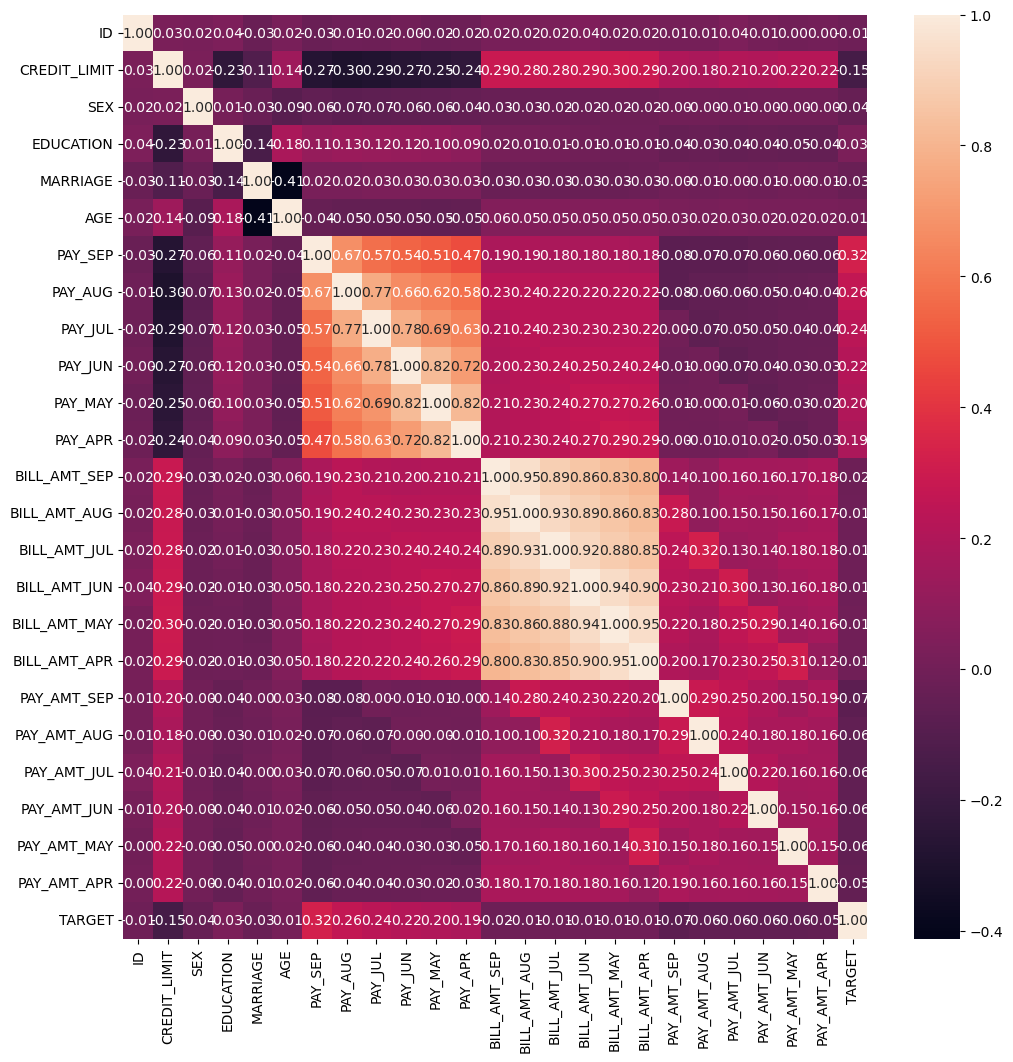

In [43]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

<a id='3.5.1.'></a>
## 3.5.1. Numerical feature - Bill Statement (BILL_AMT_XXX)

In [44]:
correlation_matrix = df.corr()
print(correlation_matrix)

                    ID  CREDIT_LIMIT       SEX  EDUCATION  MARRIAGE       AGE  \
ID            1.000000      0.026179  0.018497   0.037659 -0.028208  0.018678   
CREDIT_LIMIT  0.026179      1.000000  0.024755  -0.231088 -0.111012  0.144713   
SEX           0.018497      0.024755  1.000000   0.013627 -0.028522 -0.090874   
EDUCATION     0.037659     -0.231088  0.013627   1.000000 -0.136797  0.182434   
MARRIAGE     -0.028208     -0.111012 -0.028522  -0.136797  1.000000 -0.412001   
AGE           0.018678      0.144713 -0.090874   0.182434 -0.412001  1.000000   
PAY_SEP      -0.030575     -0.271214 -0.057643   0.112593  0.018557 -0.039447   
PAY_AUG      -0.011215     -0.296382 -0.070771   0.129703  0.023620 -0.050148   
PAY_JUL      -0.018494     -0.286123 -0.066096   0.122425  0.032399 -0.053048   
PAY_JUN      -0.002735     -0.267460 -0.060173   0.116531  0.031831 -0.049722   
PAY_MAY      -0.022199     -0.249411 -0.055064   0.104088  0.034377 -0.053826   
PAY_APR      -0.020270     -

In [45]:
bill_amnt_df = df[['BILL_AMT_SEP',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

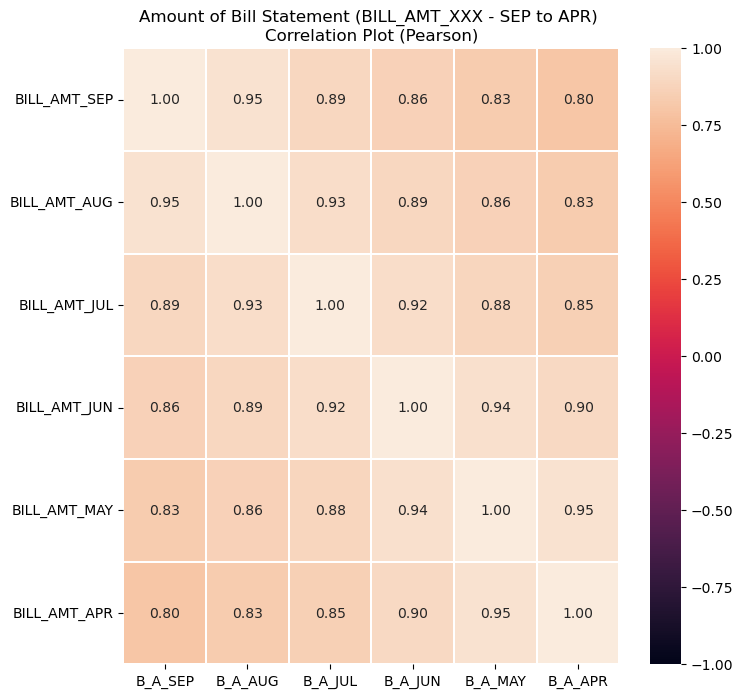

In [46]:
# Let's recreate the 'bill_amnt_df' with original column names to apply the renaming only to the x-axis
bill_amnt_df = df[['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]

# Calculate the correlation matrix for the original columns
corr = bill_amnt_df.corr()

# Now, we will only rename the x-axis labels
x_axis_labels = ['B_A_SEP', 'B_A_AUG', 'B_A_JUL', 'B_A_JUN', 'B_A_MAY', 'B_A_APR']  # Labels for the x-axis
y_axis_labels = bill_amnt_df.columns  # Labels for the y-axis (original names)

# Plotting the heatmap with renamed x-axis labels and original y-axis labels
plt.figure(figsize=(8, 8))
plt.title('Amount of Bill Statement (BILL_AMT_XXX - SEP to APR) \nCorrelation Plot (Pearson)')
sns.heatmap(corr, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=.1, vmin=-1, vmax=1, annot=True, fmt=".2f")

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

<a id='3.5.2.'></a>
## 3.5.2. Numerical feature - Previous Payment (PAY_AMT_XXX)

In [48]:

pay_amnt_df = df[['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]


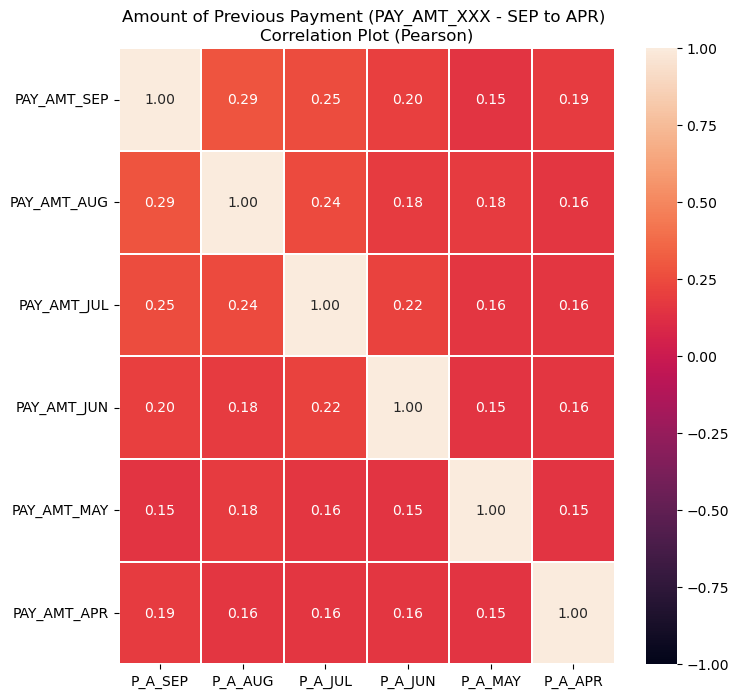

In [49]:
# Calculate the correlation matrix for the original columns
corr = pay_amnt_df.corr()

# Now, we will only rename the x-axis labels
x_axis_labels = ['P_A_SEP', 'P_A_AUG', 'P_A_JUL', 'P_A_JUN', 'P_A_MAY', 'P_A_APR']  # Labels for the x-axis
y_axis_labels = pay_amnt_df.columns  # Labels for the y-axis (original names)

# Plotting the heatmap with renamed x-axis labels and original y-axis labels
plt.figure(figsize=(8, 8))
plt.title('Amount of Previous Payment (PAY_AMT_XXX - SEP to APR) \nCorrelation Plot (Pearson)')
sns.heatmap(corr, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=.1, vmin=-1, vmax=1, annot=True, fmt=".2f")

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()